# Example `gmx dssp` dat file analysis

In this notebook I'll explore some simple analysis and visualisations of an example `gmx dssp` dat file.

In [1]:
# Standard libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read in the data

Each line of the dat file is supposed to be a DSSP sequence for a single frame of a trajectory.

I'll parse this into a Pandas DataFrame, with each row representing a single frame, and each column representing a single residue.

In [2]:
# Read the data
with open('data/ss.dat', 'r') as file:
    lines = file.readlines()

data = [[char for char in line.strip()] for line in lines]
df = pd.DataFrame.from_records(data)
df

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,~,H,H,H,H,H,H,H,H,H,...,H,T,T,S,S,S,~,S,~,~
1,~,H,H,H,H,H,H,H,H,H,...,G,G,G,S,S,S,~,~,~,~
2,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
3,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
4,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,~,~,H,H,H,H,H,H,H,H,...,H,H,S,~,S,S,~,~,~,~
9997,~,~,H,H,H,H,H,H,H,H,...,S,S,S,~,S,S,~,~,~,~
9998,~,~,H,H,H,H,H,H,H,H,...,T,S,S,~,S,S,~,~,~,~
9999,~,~,H,H,H,H,H,H,H,H,...,T,T,S,~,S,S,~,~,~,~


## Basic statistics

How long is the sequence?
How many frames are there?

In [3]:
# How long are the sequences and how many frames?
print(f"Length of sequences: {len(df.columns)}")
print(f"Number of frames: {len(df)}")

Length of sequences: 932
Number of frames: 10001


## Secondary structure composition

Now let's look at the secondary structure composition.

In [4]:
# Unique elements in the dataset
unique_elements = sorted(set(df.values.flatten()))
unique_elements

['B', 'E', 'G', 'H', 'I', 'P', 'S', 'T', '~']

To simplify the analysis, I'll collapse the 7-state DSSP sequence into a 3-state sequence, where the states are:

- H: Helix
- E: Sheet
- C: Coil


In [5]:
# Reduce SS
ss_dict = {'H': 'H', 'G': 'H', 'I': 'H', 'B': 'E', 'E': 'E', 'T': 'C', 'S': 'C'}
df_reduced = df.replace(ss_dict)
df_reduced

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,~,H,H,H,H,H,H,H,H,H,...,H,C,C,C,C,C,~,C,~,~
1,~,H,H,H,H,H,H,H,H,H,...,H,H,H,C,C,C,~,~,~,~
2,~,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,~,~,~,~
3,~,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,~,~,~,~
4,~,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,~,~,~,~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,~,~,H,H,H,H,H,H,H,H,...,H,H,C,~,C,C,~,~,~,~
9997,~,~,H,H,H,H,H,H,H,H,...,C,C,C,~,C,C,~,~,~,~
9998,~,~,H,H,H,H,H,H,H,H,...,C,C,C,~,C,C,~,~,~,~
9999,~,~,H,H,H,H,H,H,H,H,...,C,C,C,~,C,C,~,~,~,~


In [6]:
# Sequence composition
df_reduced.iloc[0, :].value_counts()

H    390
C    197
E    168
~    165
P     12
Name: 0, dtype: int64

The protein is mostly helical, with a small amount of sheet and coil.

I'm not sure what the "~" and "P" characters are, but we'll put that to onse side for now.

## Secondary structure transitions

Now let's look at the transitions between secondary structure states.

In [7]:
# Position variation
position_variation = df_reduced.apply(lambda x: x.value_counts()).fillna(0)
position_variation

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
C,0.0,490.0,1688.0,1008.0,456.0,524.0,537.0,14.0,109.0,164.0,...,7475.0,7800.0,8263.0,191.0,10001.0,9981.0,12.0,156.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,4200.0,8136.0,8990.0,9410.0,9477.0,9464.0,9987.0,9892.0,9837.0,...,2526.0,2201.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,683.0,381.0,0.0
~,10001.0,5311.0,177.0,3.0,135.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1587.0,9810.0,0.0,20.0,9311.0,9162.0,9620.0,10001.0


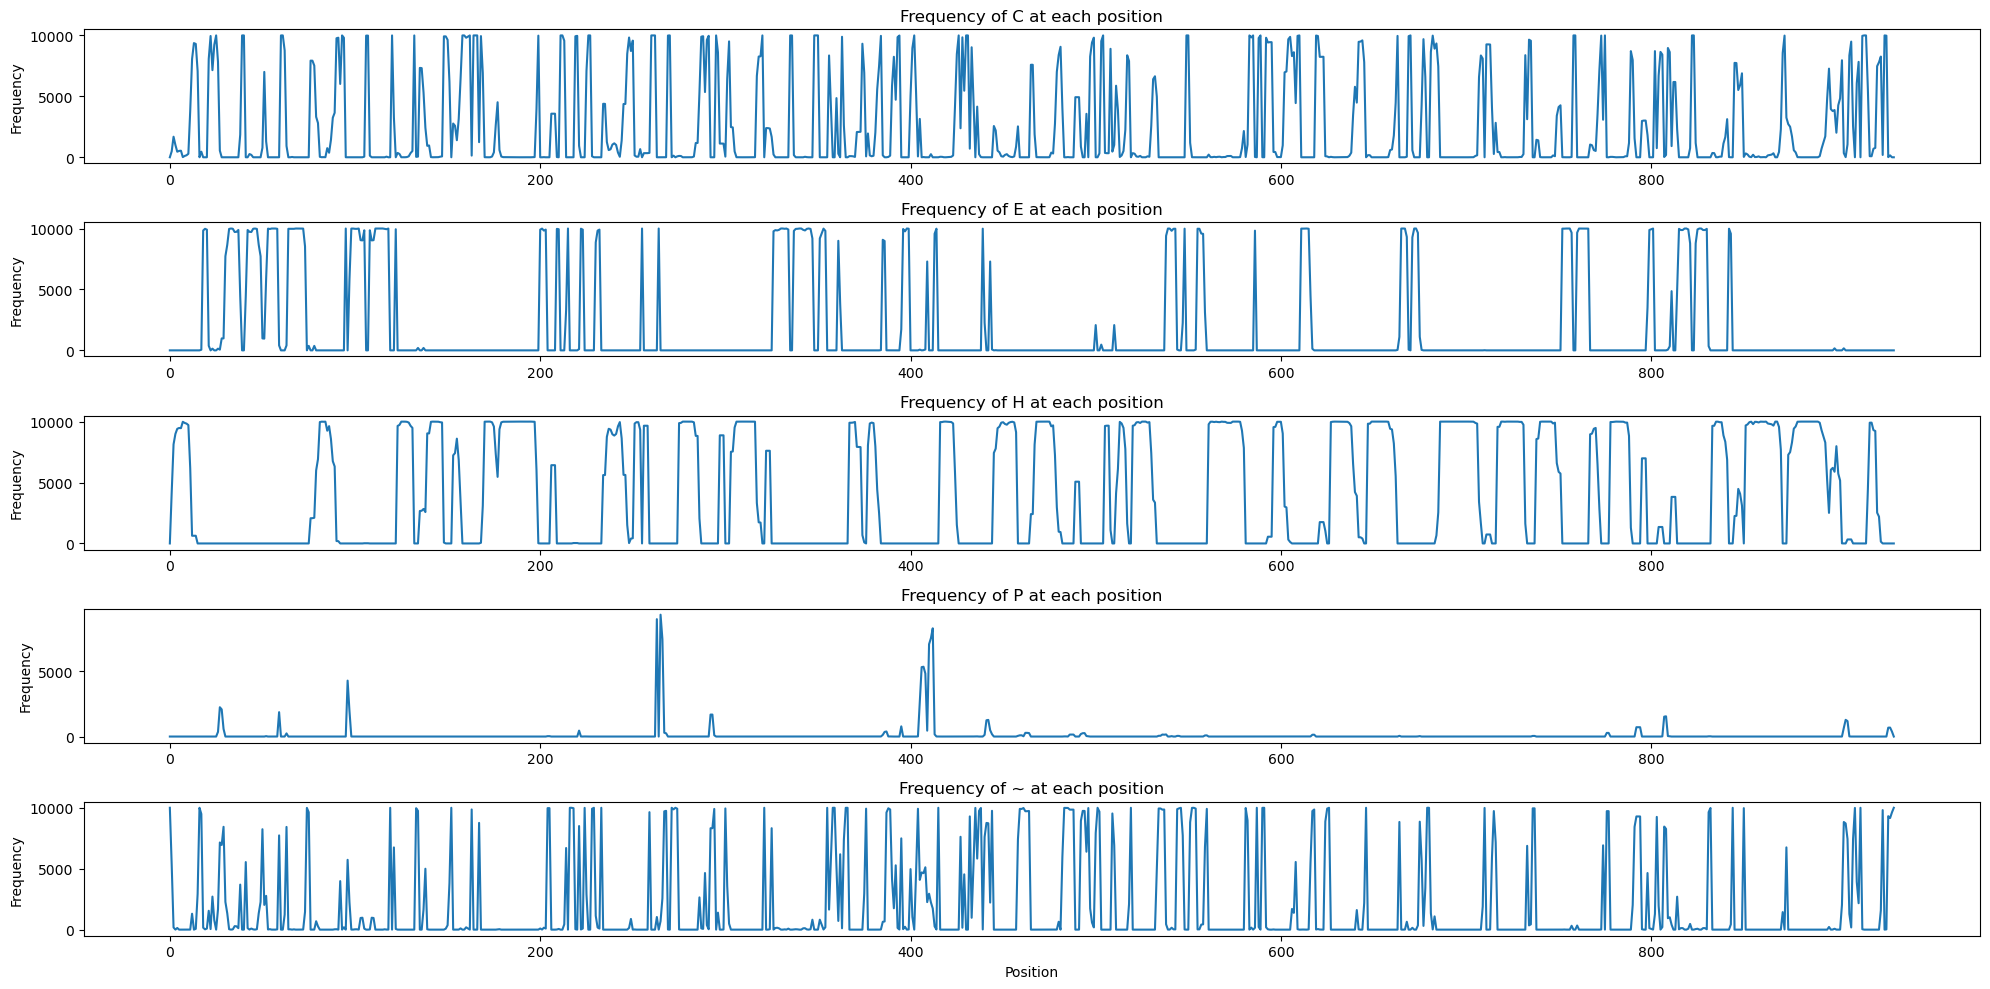

In [8]:
# Plot the frequency of each DSSP label at each position, one plot per label
fig, axs = plt.subplots(nrows=5, figsize=(20, 10))
for ax, label in zip(axs, position_variation.index):
    ax.plot(position_variation.loc[label, :], label=label)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {label} at each position')

ax.set_xlabel('Position')
plt.tight_layout()



## Consensus secondary structure

Now for the consensus secondary structure.

In [9]:
# Evaluate secondary structure at each position
consensus = df_reduced.mode(axis=0)
consensus


,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,~,~,H,H,H,H,H,H,H,H,...,C,C,C,~,C,C,~,~,~,~


In [10]:
# Threshold for a position to be considered consistent
threshold = 0.9
consistent_positions = []
variable_positions = []
for position in df_reduced:
    if df_reduced[position].value_counts().max() > threshold * len(df_reduced[position]):
        consistent_positions.append(position)
    else:
        variable_positions.append(position)

print('N consistent positions: ', len(consistent_positions))
print('N variable positions: ', len(variable_positions))

N consistent positions:  670
N variable positions:  262


In [11]:
df_reduced.apply(lambda x: x.value_counts().max() > threshold * len(x), axis=0)

0       True
1      False
2      False
3      False
4       True
       ...  
927     True
928     True
929     True
930     True
931     True
Length: 932, dtype: bool

In [12]:
# Varibility of each position
variability = 1 - df_reduced.apply(lambda x: x.value_counts().max() / len(x), axis=0)
variability

0      0.000000
1      0.468953
2      0.186481
3      0.101090
4      0.059094
         ...   
927    0.002000
928    0.068993
929    0.083892
930    0.038096
931    0.000000
Length: 932, dtype: float64

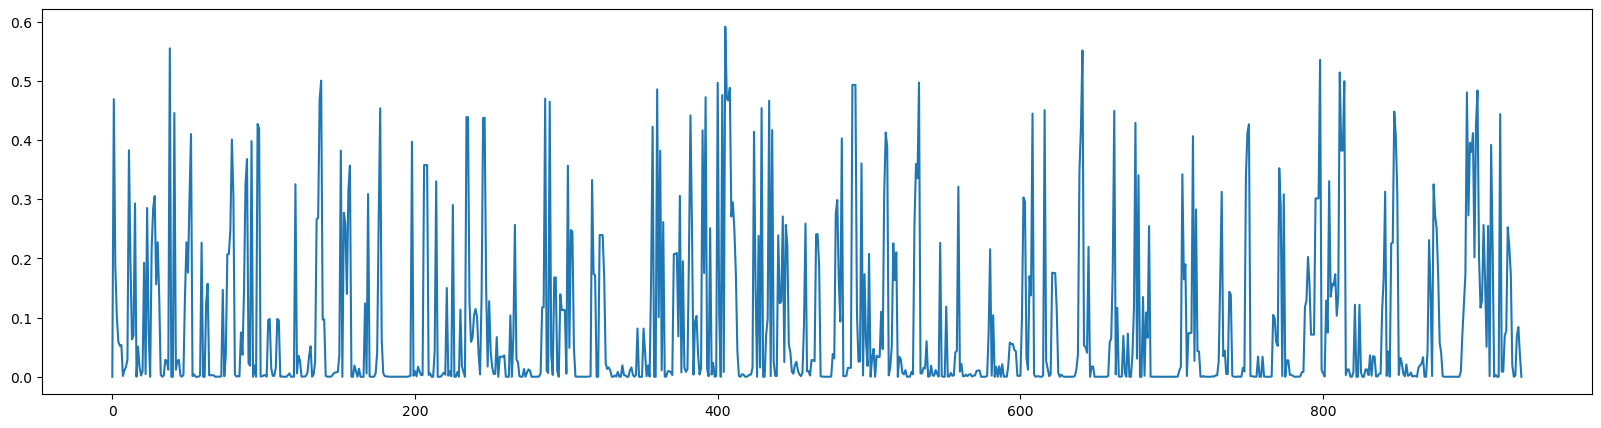

In [13]:
# Plot variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability)

In [14]:
# window the variability
window_size = 7
variability_windowed = variability.rolling(window_size).mean()
variability_windowed


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
927    0.106375
928    0.105218
929    0.081120
930    0.055123
931    0.030297
Length: 932, dtype: float64

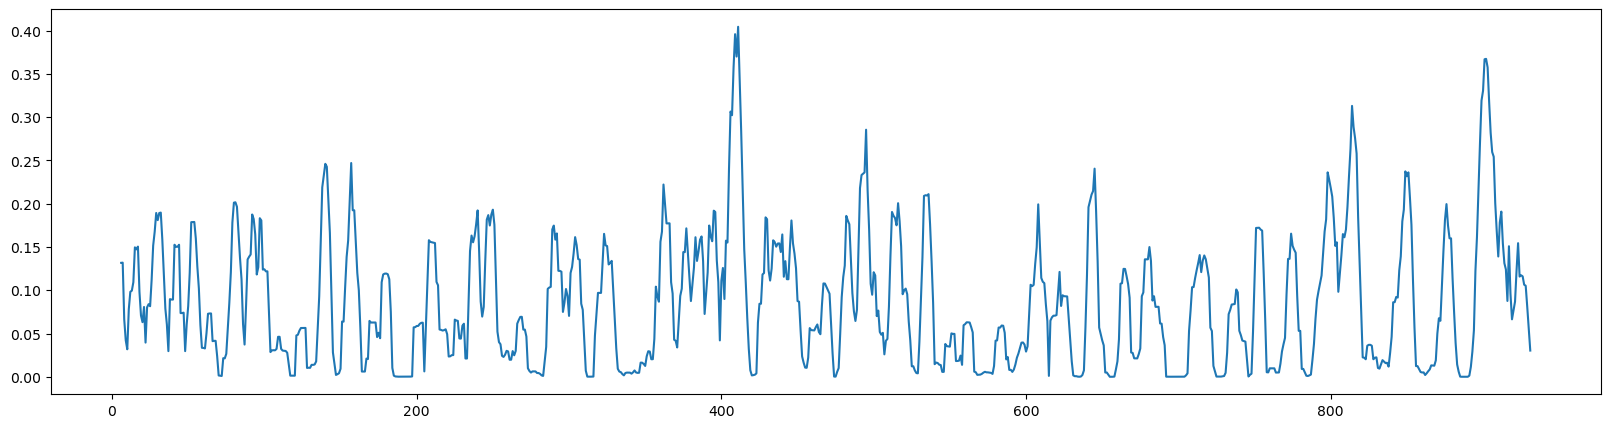

In [15]:
# plot windowed variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability_windowed)

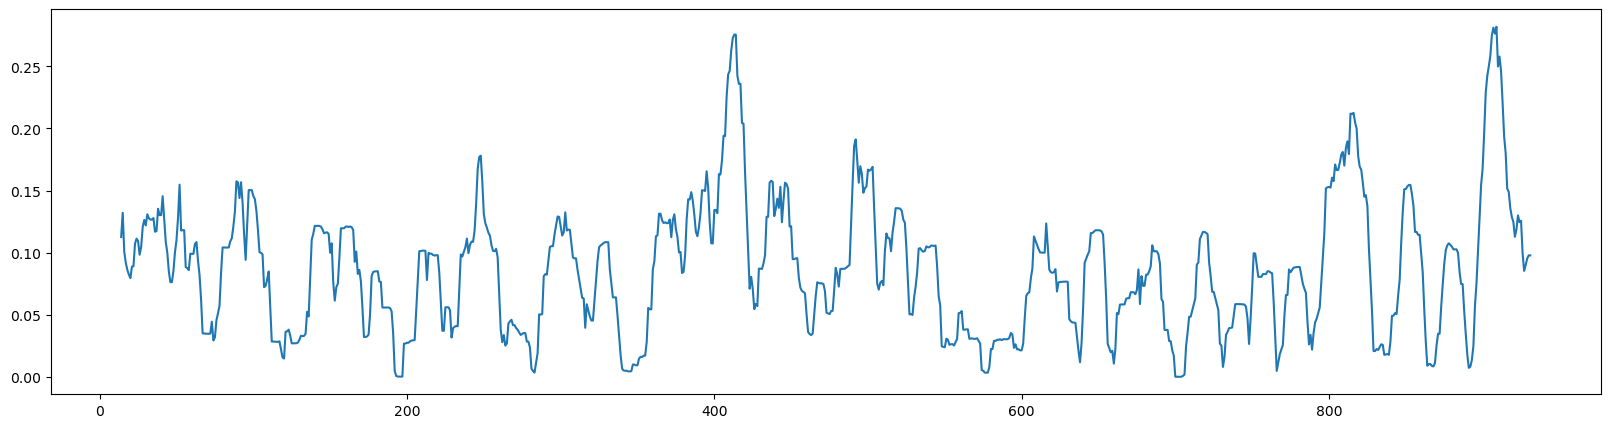

In [16]:
# Try larger window
window_size = 15
variability_windowed = variability.rolling(window_size).mean()

# plot windowed variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability_windowed)


In [17]:
df_reduced.iloc[:, 390:410].apply(lambda x: x.value_counts()).fillna(0)

,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409
C,5838.0,8248.0,4723.0,9865.0,9992.0,0.0,0.0,0.0,0.0,0.0,5034.0,8964.0,10001.0,5242.0,70.0,3148,2,18,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,1732.0,9962.0,9767.0,10001.0,9987.0,0.0,0.0,0.0,0.0,0.0,60,1,16,72.0,7292.0
P,0.0,0.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2706,5302,5332,4811.0,450.0
~,4163.0,1753.0,5278.0,136.0,9.0,7490.0,39.0,234.0,0.0,14.0,4967.0,1037.0,0.0,4759.0,9920.0,4087,4696,4635,5118.0,2259.0


## Detailed secondary structure transitions

In [18]:
# Enumerate the transitions between two frames
pd.crosstab(df_reduced.iloc[0], df_reduced.iloc[1])

1,C,E,H,P,~
0,,,,,
C,165,0,22,0,10
E,1,156,0,1,10
H,22,0,366,0,2
P,0,2,0,10,0
~,5,4,0,0,156
